# Load Data

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [91]:
#Menampilkan informasi data
data = pd.read_csv ('/content/cat_dog.csv')
data.head()
data.info() #Untuk menunjukan data Balance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25000 non-null  object
 1   labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [92]:
print (data)


               image  labels
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]


# Membangun Model

In [102]:
# Memeriksa tipe data kolom
numeric_columns = data.select_dtypes(include=[np.number]).columns
print (numeric_columns)

Index(['labels'], dtype='object')


In [94]:
# Memilih hanya kolom numerik
X = data[numeric_columns]
print(X)

       labels
0           1
1           0
2           0
3           0
4           1
...       ...
24995       1
24996       1
24997       0
24998       1
24999       0

[25000 rows x 1 columns]


In [104]:
# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)
print (X)

[[ 1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [ 1.]
 [-1.]]


In [96]:
y = data['labels']

In [97]:
#Membagi data menjadi 20 pesen data test dan 80 persen data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Membangun model NN sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), #Jumlah 128 neuron input layer
    tf.keras.layers.Dropout(0.2), #DO Rate adalah 0.2
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer adalah 64 neuron
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer 1
])
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [112]:
# Pelatihan model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# Model akan dilatih sebanyak 10 kali
# dalam satu pelatihan data akan melatih 32 file


Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9972 - val_loss: 7.2824e-05 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 4.4203e-05 - accuracy: 1.0000 - val_loss: 1.5418e-05 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 1.3481e-05 - accuracy: 1.0000 - val_loss: 5.9662e-06 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 6.1921e-06 - accuracy: 1.0000 - val_loss: 2.8855e-06 - val_accuracy: 1.0000
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 3.3238e-06 - accuracy: 1.0000 - val_loss: 1.5728e-06 - val_accuracy: 1.0000
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9524e-06 - accuracy: 1.0000 - val_loss: 9.1896e-07 - val_accuracy: 1.0000
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 1.2209e-06 - accuracy: 1.0000 

In [100]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

157/157 [==============================] - 1s 4ms/step - loss: 7.7092e-08 - accuracy: 1.0000
Test Accuracy: 1.0


In [107]:
matrix = confusion_matrix(X_test, y_test)
print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[   0 2508    0]
 [   0    0    0]
 [   0    0 2492]]


In [101]:
from sklearn.metrics import confusion_matrix, classification_report

class_report = classification_report(X_test, y_test)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      2508
         0.0       0.00      0.00      0.00         0
         1.0       1.00      1.00      1.00      2492

    accuracy                           0.50      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.50      0.50      0.50      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Visualisasi Data

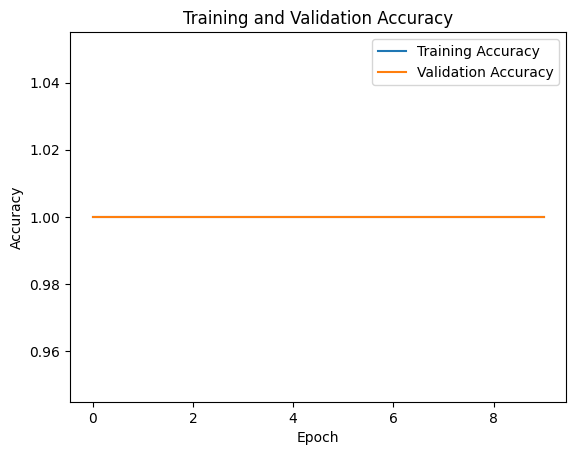

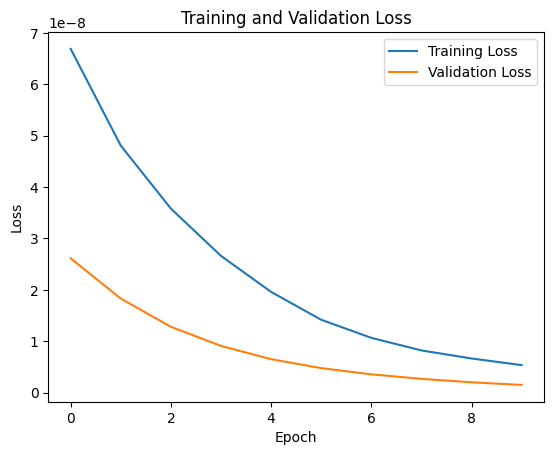

In [86]:
# Membuat plot untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Membuat plot untuk loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Mengganti jumlah input layer dan hidden layer

In [119]:
# Membangun model NN sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_train.shape[1],)), #Jumlah 2 neuron input layer
    tf.keras.layers.Dropout(0.2), #DO Rate adalah 0.2
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer adalah 32 neuron
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer 1
])
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [117]:
# Pelatihan model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3876 - accuracy: 0.8990 - val_loss: 0.2192 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2008 - accuracy: 0.9800 - val_loss: 0.1410 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1477 - accuracy: 0.9806 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1205 - accuracy: 0.9801 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1031 - accuracy: 0.9808 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9808 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9811 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 

In [121]:
class_report = classification_report(X_test, y_test)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      2508
         0.0       0.00      0.00      0.00         0
         1.0       1.00      1.00      1.00      2492

    accuracy                           0.50      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.50      0.50      0.50      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

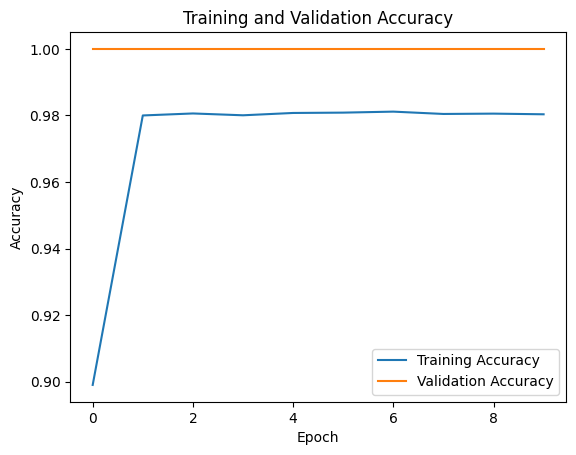

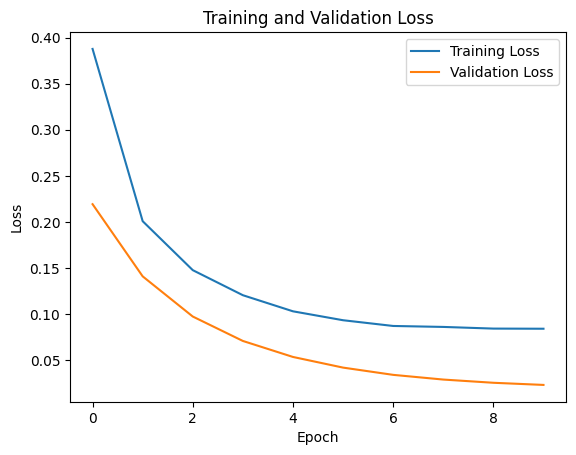

In [120]:
#Visualisasi Data akurasi dan Loss
# Membuat plot untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Membuat plot untuk loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()